<a href="https://colab.research.google.com/github/shiqisim/Final-Project/blob/main/final_project_actual_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Neural Networks: Deep Learning on a public dataset


#1. Introduction


Breast cancer is a common disease that has affected numerous women around the world. It is often not easy to detect if one has breast cancer in the early stages as there may not be any symptoms. Hence, it is important for early detection to occur to prevent further deaths. This disease happens when there is lining cells of the ducts or lobules in the glandular tissue of the breast [1]. This type of cancer has a high treatment rate if detected early and before the cancerous cells spread to the other parts of the body.

In 2020, 2.3 million women were diagnosed with breast cancer and there were 685000 deaths around the world. This reflects how common this type of cancer is as it could occur at any age after puberty for women. Males could contract breast cancer too, but such cases are significantly lesser than the probability of a female contracting it. Statistics have shown how the survival rate of breast cancer after diagnosis for at least five years are more than 90% in high income countries, 66% in India and 40% in South Africa [2]. As a result, this project seeks to develop a deep learning model to assist the lower income countries with detecting the risk of one contracting breast cancer and to get treatment earlier. Healthcare systems should also be put in place in managing breast cancer cases through ‘referral pathways' World Health Organisation [2021]to ease the complications surrounding it.

The aim of this project is to develop a deep learning model that explores multiple algorithms for predicting whether one is at a risk of getting breast cancer and to implement the best algorithm. For example, Convolutional Neural Networks (CNN), Artificial Neural Network (ANN) and Residual Neural Network (RNN). Subsequently, it should also classify, detect and conduct segmentation on the breast ultrasound images for predicting breast cancer, as well as perform evaluation on the different machine learning models.
The objectives would be to develop an original model with suitable depth, deliver a clear and concise analysis that is well documented, as well as an evaluation on the different models created.

#2. Defining the problem and assembling a dataset

This dataset, 'Breast Ultrasound Images Dataset' [3] includes the medical images of breast cancer from ultrasound scans and it is categorised into three classes. They are malignant, benign and normal images. This data was collected in 2018 and the patients are aged between 25 and 75 years old and there are 600 person in total. The dataset consists of 780 images with an average image size of 500*500 pixels and in PNG format. The ground truth images are presented with original images. Hence, I would like to explore and perform segmentation of the ultrasound images to predict whether one has breast cancer. The data availability is sufficient for me to conduct segmentation of the images based on the three classes. The ground truth accuracy was also verified by the radiologists from Baheya and the incorrect annotation was fixed.

The problem about this dataset, however, is that it is a multi-class segmentation with single-label classification and the data is imbalanced. Thus, for the last-layer activation, I would be using 'softmax' and 'categorical_crossentropy' for the loss function. The input features would be all the images from the benign, normal and malignant class and the output would be the predictions of image that has been converted from categorical to numerical data using the one hot encoding technique. To resolve the imbalanced issue, class weights would be added during training.


#3. Choosing a measure of success

The metric of success for this model would be precision, recall, AUROC (Area Under the Receiver Operating Characteristics), balanced accuracy score and f1-score.

Precision is the measurement of the correctly classified positive results over the total classified positive results which includes correct and incorrect results [4]. Recall is the 'ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples' [4]. It is used to 'measure the model's ability to detect positive samples' [4]. Precision and recall is widely used as a performance metric for classification models in machine learning. [4]

'ROC is a probability curve and AUC represents the degree or measure of separability.' [5] It measures how well the 'model is capable of distinguishing between classes' [5] The higher the AUC, the higher the probability of the model is at predicting the correct classes. 'An excellent model has AUC near to the 1 which means it has a good measure of separability.'[5] 'A poor model has an AUC near 0 which means it has the worst measure of separability.'[5] 'ROC analysis does not have any bias toward models that perform well on the minority class at the expense of the majority class—a property that is quite attractive when dealing with imbalanced data.' [6] Hence, this is a good metric to use for evaluation for imbalanced datasets.

Additionally, the balanced accuracy score is chosen as it is widely used in multiclass classification and issues of an imbalanced dataset. The definition for it is calculated as the average of recall in each class. Lastly, the f1-measure is selected as a metric in this project as it can 'combine both precision and recall into a single measure that captures both properties' [7]. 'The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data.'[7] Hence, this shows that this metric is useful for this imbalanced dataset and would aid me in the evaluation process. To determine the results of the metric, the best result would be defined as 1.0 and the worst would be 0.0.

#4. Deciding on an evaluation protocol

The evaluation protocol that I have chosen for this project would be the K-fold cross-validation. For K-fold cross-validation, 'the procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into'[8]. I have chosen this method as it is stated that it is 'simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split' [8]. In general, out of the groups, one would be used as test set whilst the reemaining would be the train set. 'The model is trained on the training set and scored on the test set.' [9]

The advantage of using the K-fold cross validation is that it is useful for data that is limited and prevents overfitting. The disadvantage, however, would be that it is computationally intensive as it will train and test the model continuously. For hold-out validation, the advantage would be that it has lesser computation costs, good for large datasets and building of first model. The disadvantage would be that it is highly dependent on the train and test split unlike the cross-validation methods which can train on 'multiple train-test splits' [10].

Hence, I have selected the K-fold cross-validation for this project as the data is limited and would prevent overfitting.


#5. Preparing your data

In [ ]:
pip install scikit-learn==1.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.12.0'

In [ ]:
import numpy as np
import pandas as pd

# mount gdrive, required for downloaded dataset (or sql data dump)
import os
from google.colab import drive
drive.mount("/content/drive")

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import itertools
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from keras.utils import load_img, img_to_array
from keras.models import Sequential, clone_model
from tensorflow.keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from keras.layers import Dense,Activation
from keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from keras.layers import LSTM,Bidirectional,Reshape
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import Precision, Recall, AUC

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix

from PIL import Image

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

SEED = 270

tf.random.set_seed(SEED)
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
No GPU, using /device:CPU:0.


In [ ]:
# project name
os.environ["PROJECT_NAME"] = "breast-cancer"

# set folder paths in gdrive for the coursework
os.environ["CODER_HOME"] = "/content"
os.environ["PROJECTS"] = os.getenv("CODER_HOME") + "/project"
os.environ["PROJECT_HOME"] = os.getenv("PROJECTS") + "/" + os.getenv("PROJECT_NAME")
os.environ["DATA_PATH"] = os.getenv("PROJECT_HOME") + "/data"
os.environ["SCRIPT_PATH"] = os.getenv("PROJECT_HOME") + "/scripts"

# heirachically create project folders in local if not exist
!mkdir -p $CODER_HOME
!mkdir -p $PROJECTS
!mkdir -p $PROJECT_HOME
!mkdir -p $DATA_PATH
!mkdir -p $SCRIPT_PATH

# set folder paths on gdrive for the coursework
os.environ["GD_COURSE_HOME"] = "/content/drive/MyDrive/data"
os.environ["GD_PROJECT_HOME"] = os.getenv("GD_COURSE_HOME") + "/" + os.getenv("PROJECT_NAME")
os.environ["GD_DATA_PATH"] = os.getenv("GD_PROJECT_HOME") + "/data"
os.environ["GD_SCRIPT_PATH"] = os.getenv("GD_PROJECT_HOME") + "/scripts"

# heirachically create project folders in gdrive if not exist
!mkdir -p $GD_COURSE_HOME
!mkdir -p $GD_PROJECT_HOME
!mkdir -p $GD_DATA_PATH
!mkdir -p $GD_SCRIPT_PATH

In [ ]:
!ls -d $PROJECT_HOME/*

/content/project/breast-cancer/data  /content/project/breast-cancer/scripts


In [ ]:
# defining file path
filePath = "/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT"

# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['benign', 'malignant', 'normal']:
    class_path = os.path.join(filePath, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels)


In [ ]:
print(labels.shape)
print(len(image_files))

(1578, 3)
1578


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=SEED, stratify=labels)
# X_train, X_val, y_train, y_val = train_test_split(image_files, labels, test_size=0.25, random_state=42, stratify=labels)

# X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = labels)

In [ ]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1262 1262
316 316


In [ ]:
# Define a function to load and preprocess the images
def load_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image = image.convert('L')
    image = np.array(image)
    image = image.reshape((150, 150, 1))
    image = image.astype('float32') / 255.0
    return image


X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
#remove unwanted dimension
if X_train.shape[-1] == 1:
    X_train = np.squeeze(X_train, axis = -1)
print(X_train.shape, y_train.shape)

if X_test.shape[-1] == 1:
    X_test = np.squeeze(X_test, axis = -1)
print(X_test.shape,y_test.shape)



(1262, 150, 150) (1262, 3)
(316, 150, 150) (316, 3)


#6. Developing a model that does better than a baseline

In [ ]:
# get maximum value of y_train set & estimate class weights of unbalanced dataset
labels = np.argmax(y_train, axis=1)
weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
CLASS_WEIGHT = dict(enumerate(weights))

CLASS_WEIGHT

{0: 0.5908239700374532, 1: 1.248269040553907, 2: 1.9749608763693272}

This method above will solve the imbalanced data problem using the compute_class_weight method to estimate the class weights. The classes are in the sequence: normal, malignant and benign. The normal class has a value of 0.583, malignant with 1.302 and 1.931 for benign tumours. The benign class has the highest class weights and this means that it has the highest influence out of the other classes when training and more benign samples could be included to have a balanced data.

In [ ]:
# INPUT_DIMENSION = X_train.shape
OUTPUT_CLASSES = y_train.shape[1]

OPTIMIZER = 'adam'
LOSS_FUNC = 'categorical_crossentropy'
METRICS = ['categorical_accuracy',
          tf.keras.metrics.AUC(name= 'auc', multi_label=True)]


EARLY_STOP = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5, verbose=0)


In [ ]:
# baseline model
def resnet():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(OUTPUT_CLASSES,activation='softmax', input_shape = X_train.shape))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics= ['acc'])

    return model

In [ ]:
# model.build(X_train.shape)
# model.summary()

In [ ]:
batch_size = 520
EPOCHS = 10

EARLY_STOP = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience= 5, verbose=0)

In [ ]:
model = resnet()

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = labels)

history = model.fit(X_train, y_train,
          class_weight=CLASS_WEIGHT,
          batch_size=batch_size, epochs=EPOCHS,
          validation_data=(X_val, y_val),
          callbacks=[EARLY_STOP],
          verbose=0)

# 6.1 Training baseline model

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score,precision_score
def evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history):
    train_loss , train_acc = model.evaluate(X_train,y_train)
    val_loss, val_acc = model.evaluate(X_val,y_val)
    test_loss_value , test_accuracy = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_label = np.argmax(y_pred,axis=1)
    y_true_label = np.argmax(y_test,axis=1)
    f1_measure = f1_score(y_true_label,y_pred_label,average='weighted')
    roc_score = roc_auc_score(y_test,y_pred)
    precisionScore = precision_score(y_true_label,y_pred_label,average='weighted')
    recallScore = recall_score(y_true_label,y_pred_label,average='weighted')

    print("Train accuracy = "+str(train_acc))
    print("Validation accuracy = "+str(val_acc))
    print('Test accuracy = ' + str(test_accuracy))
    print("f1_measure = "+str(f1_measure))
    print("roc_area = "+str(roc_score))
    print("precision score = " +str(precisionScore))
    print("recall score = " +str(recallScore))


In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()

In [ ]:
def fit_evaluate(model,X_train,y_train,X_test,y_test,bs,Epochs,patience):
    es = EarlyStopping(monitor='val_loss', mode='min', patience=patience,restore_best_weights=True, verbose=1)
    # X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = y_train)
    history = model.fit(X_train,y_train,batch_size = bs,epochs=Epochs,validation_data = (X_val,y_val), callbacks=[es])
    evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history)
    Train_Val_Plot(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])

#6.2 Plotting the training and validation loss

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_1 (Dense)             (1135, 3)                 67503     
                                                                 
Total params: 67,503
Trainable params: 67,503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
71/71 [==============================] - 2s 13ms/step - loss: 1.8816 - acc: 0.4097 - val_loss: 1.2175 - val_acc: 0.3937
Epoch 2/10
71/71 [==============================] - 1s 8ms/step - loss: 1.2343 - acc: 0.4855 - val_loss: 1.2696 - val_acc: 0.3937
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 1.1844 - acc: 0.5022 - val_loss: 1.1289 - val_acc: 0.5197
Epoch 4/10
71/71 [==============================] - 1s 

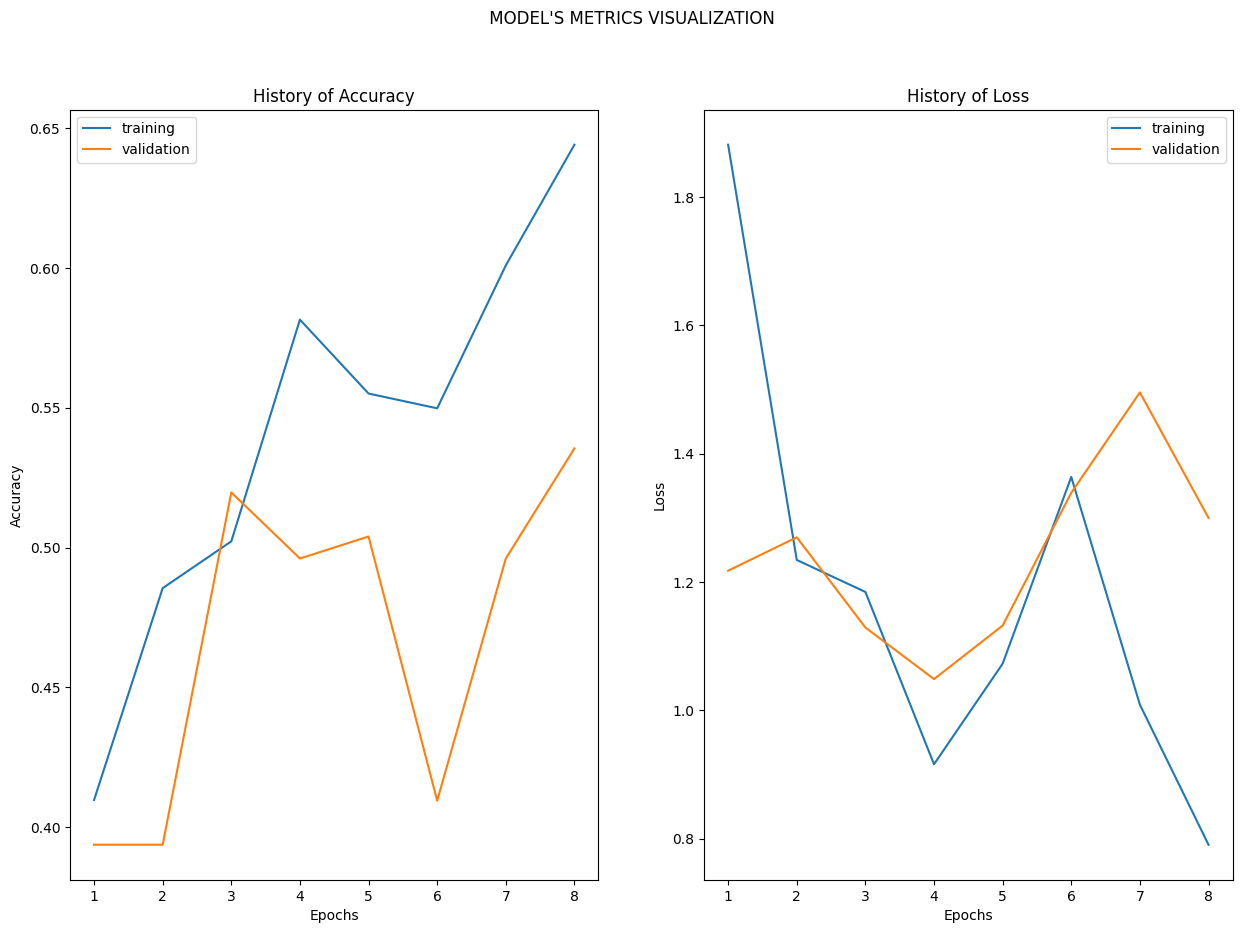

In [ ]:
model = resnet()
model.build(X_train.shape)
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,10,4)

As seen above, the validation and training loss have instances of good fit at the second epoch, around the 3.2 epoch and the 5.5 epoch. From the second epoch onwards, both the validation and training loss starts to decrease until the fourth epoch and then increases again. There are signs of underfitting after the 3.2 epoch as the validation loss is higher than the training loss. At around the 3.2 epoch, the training loss decreases but starts to increase again after the fourth epoch which indicates the sign of slight overfitting here.

After the sixth epoch, the training loss decreases till the eighth epoch while the validaton loss increases till the seventh epoch before decreasing till the eigth epoch. The patience parameter is set at 4 and hence, four epochs should be deducted from the actual epoch as seen in the diagram above. The lowest validation loss is around the eight epoch but four should be deducted and hence, the fourth epoch is the optimal number of epochs for this model.

The accuracy of validation remains the same until the second epoch and it increases from the second to the third epoch, before decreasing significantly from the third to the fifth epoch. It then decreases till the sixth epoch before increasing again till the eighth epoch. For the training accuracy, it increases from the first to the fourth epoch before decreasing from the fourth to the sixth epoch. This indicates that there is slight overfitting. After the sixth epoch, it increases until the eight epoch.

Both the precision and recall score is around 0.51 and 0.52 respectively which means that this baseline model is not performing well as the definition of a good model would be at least 0.70 and above. The ROC area is relatively high at around 0.66 and this means that the predictions of this baseline model are around 0.66% correct as the roc score of 1.0 would determine that the predictions are 100% correct.



#7 Scaling up: developing a model that overfits

In [ ]:
# overfit model
def resnetOverfit():

    model = Sequential()

    model.add(Flatten())
    # model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

    return model

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_48 (Flatten)        (1135, 22500)             0         
                                                                 
 dense_116 (Dense)           (1135, 64)                1440064   
                                                                 
 dense_117 (Dense)           (1135, 3)                 195       
                                                                 
Total params: 1,440,259
Trainable params: 1,440,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
71/71 [==============================] - 2s 23ms/step - loss: 1.4293 - acc: 0.4907 - val_loss: 0.9509 - val_acc: 0.5276
Epoch 2/20
71/71 [==============================] - 1s 19ms/step - loss: 0.9345 - acc: 0.6264 - val_loss: 1.0117 - val_acc: 0.5669
Epoch 3/20
71/71 [===========================

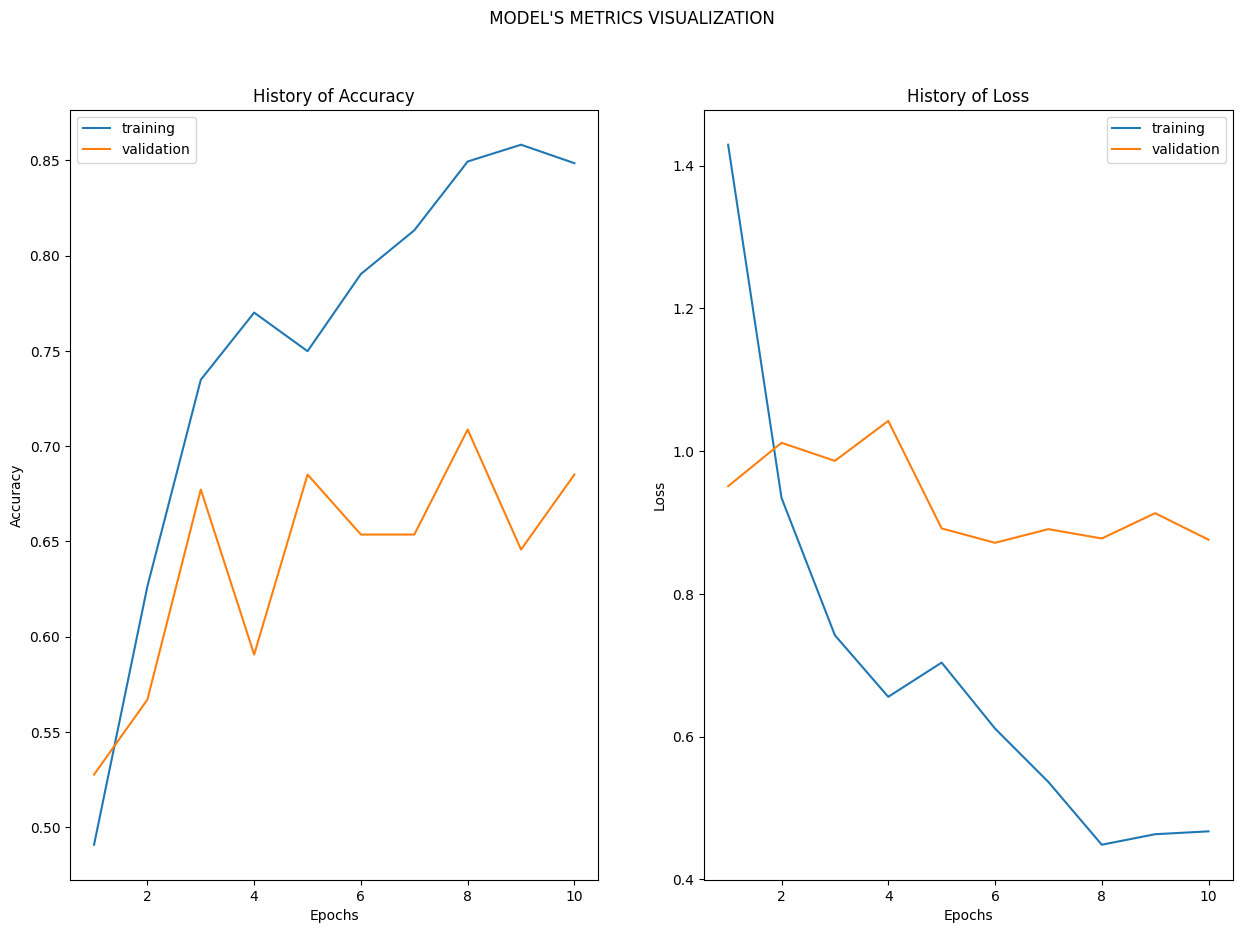

In [ ]:
model = resnetOverfit()
model.build(X_train.shape)
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

As seen above, the validation and training loss have instances of good fit at the second epoch. From the second epoch onwards, the validation loss starts to decreases significantly until the third epoch and then increases till the fourth epoch before decreasing again till the tenth epoch. There are signs of overfitting after the second epoch as the validation loss is higher than the training loss. The training loss decreases but starts to increase again after the fourth epoch and decreases after the fifth epoch till the eighth epoch. After the eigth epoch, it increases a little until the tenth epoch.

The accuracy of training increases significantly until the fourth epoch and it decreases a little from the fourth to the fifth epoch, before increasing significantly till the ninth epoch. For the validation accuracy, it increases from the first to the third epoch before decreasing from the third to the fourth epoch. This indicates that there is overfitting as the training and validation accuracy have a huge difference in values.

Both the precision and recall score is around 0.70 and 0.71 respectively which means that the model's predictions of the positive class is good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.80 and this means that the predictions of this model are around 0.80% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.70 which is considered good as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's prediction is relatively good based on the precision, recall, f1-measure and roc score.

#8. Regularising your model and tuning your hyperparameters

# 8.1 Adding dropout to 'deep model 1'

To regularise a model and tuning of hyperparameters, I would need to add dropout, add more layers and add L2 regularisation. Adding a dropout layer will set input units to zero with a frequency of rate at each step during training time to prevent overfitting.(Keras, no date)

In [40]:
# deep model
def deepModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    return model


In [41]:
model = deepModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_4 (Dense)             (1135, 64)                1440064   
                                                                 
 dropout_1 (Dropout)         (1135, 64)                0         
                                                                 
 dense_5 (Dense)             (1135, 3)                 195       
                                                                 
Total params: 1,440,259
Trainable params: 1,440,259
Non-trainable params: 0
_________________________________________________________________


#8.2 Adding more units to make the model wider

In [76]:
# wider model
def widerModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

    return model

In [77]:
model = widerModel()
model.build(X_train.shape)
model.summary()
# fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (1135, 22500)             0         
                                                                 
 dense_58 (Dense)            (1135, 128)               2880128   
                                                                 
 dropout_28 (Dropout)        (1135, 128)               0         
                                                                 
 dense_59 (Dense)            (1135, 3)                 387       
                                                                 
Total params: 2,880,515
Trainable params: 2,880,515
Non-trainable params: 0
_________________________________________________________________


#8.3 Adding three dense layers of 64 units and two dropout layers of 0.5 dropout rate

In [44]:
# deeper model
def deeperModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    print(model)
    return model

In [45]:
model = deeperModel()
model.build(X_train.shape)
model.summary()
# fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_8 (Dense)             (1135, 64)                1440064   
                                                                 
 dropout_3 (Dropout)         (1135, 64)                0         
                                                                 
 dense_9 (Dense)             (1135, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (1135, 64)                0         
                                                                 
 dense_10 (Dense)            (1135, 3)                 195       
                                                                 
Total params: 1,444,419
Trainable params: 1,444,419
No

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.12.0'

#8.4 Cross Validation

##8.4.1 K-fold Validation (deepModel)



In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
deepModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = deepModel()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    deepModelScore.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
deepModelScore

In [34]:
deepModelScore = [0.6377952694892883,
0.6299212574958801,
0.6614173054695129,
0.6535432934761047,
0.6377952694892883]

np.mean(deepModelScore)

0.6440944790840148

The metric used here is the mean absolute error which is the absolute value of the difference between the predictions and the targets. The average for this score is around 0.6 and this means that the prediction is off by this average amount.

##8.4.2 Saving validation logs at each fold (deepModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = deepModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
deep_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
deep_average_mae_history

[0.371493399143219,
 0.34739646315574646,
 0.33167014718055726,
 0.32128355503082273,
 0.311714893579483,
 0.30468573570251467,
 0.30496466755867,
 0.2928798973560333,
 0.29843289256095884,
 0.2920869290828705,
 0.2894285976886749,
 0.28926087617874147,
 0.2957026958465576,
 0.29196099638938905,
 0.2897610604763031,
 0.2941389262676239,
 0.2890170097351074,
 0.2902349293231964,
 0.28814687132835387,
 0.2822208762168884,
 0.2831954300403595,
 0.28201158046722413,
 0.28722036480903623,
 0.2827733278274536,
 0.286206978559494]

This method above saves the validation scores at each epoch to see how well the model performs and to perform evaluation. The 22nd epoch has the lowest average of mean absolute error which means that the optimal epoch is 22 for this deepModel.

##8.4.3 K-fold Validation (deeperModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
deeperModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = deeperModel()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    deeperModelScore.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
deeperModelScore

[0.6535432934761047,
 0.6535432934761047,
 0.6535432934761047,
 0.6535432934761047,
 0.6535432934761047]

In [35]:
deeperModelScore = [0.6535432934761047,
 0.6535432934761047,
 0.6535432934761047,
 0.6535432934761047,
 0.6535432934761047]

np.mean(deeperModelScore)

0.6535432934761047

The metric used here is the mean absolute error which is the absolute value of the difference between the predictions and the targets. The average for this score is around 0.65 and this means that the prediction is off by this average amount.

##8.4.4 Saving validation logs at each fold (deeperModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = deeperModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
deeper_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
deeper_average_mae_history

[0.37622383832931516,
 0.3473998010158539,
 0.32236270904541015,
 0.3190653145313263,
 0.31422725319862366,
 0.3049736976623535,
 0.3047738611698151,
 0.2991348385810852,
 0.30555686354637146,
 0.3036084115505219,
 0.30264278650283816,
 0.2965652167797089,
 0.3009979367256165,
 0.30430936217308047,
 0.2969089984893799,
 0.2960203289985657,
 0.29791702032089235,
 0.2824025809764862,
 0.2958921790122986,
 0.2954941034317017,
 0.2918540298938751,
 0.2919591188430786,
 0.29175872206687925,
 0.2896074950695038,
 0.29574682116508483]

This method above saves the validation scores at each epoch to see how well the model performs and to perform evaluation. The 18th epoch has the lowest average of mean absolute error which means that the optimal epoch is 18 for this deeperModel.

##8.4.5 K-fold Validation (widerModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
widerModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = widerModel()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    widerModelScore.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
widerModelScore

[0.6692913174629211,
 0.6456692814826965,
 0.6220472455024719,
 0.6456692814826965,
 0.6535432934761047]

In [38]:
widerModelScore = [0.6692913174629211,
 0.6456692814826965,
 0.6220472455024719,
 0.6456692814826965,
 0.6535432934761047]

np.mean(widerModelScore)

0.6472440838813782

The metric used here is the mean absolute error which is the absolute value of the difference between the predictions and the targets. The average for this score is around 0.65 and this means that the prediction is off by this average amount.

##8.4.6 Saving validation logs at each fold (widerModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = widerModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
wider_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
wider_average_mae_history

[0.3565296709537506,
 0.33454241156578063,
 0.316990453004837,
 0.3115599870681763,
 0.2993986546993256,
 0.29609376192092896,
 0.29845300912857053,
 0.2887446701526642,
 0.2891163170337677,
 0.28294392228126525,
 0.29286198019981385,
 0.28667072057723997,
 0.2881882607936859,
 0.2902772605419159,
 0.2803459703922272,
 0.2904745042324066,
 0.28673709034919737,
 0.2874420940876007,
 0.2864653766155243,
 0.2809144973754883,
 0.2778562784194946,
 0.28181722164154055,
 0.2803960978984833,
 0.27890217304229736,
 0.28350055813789365]

This method above saves the validation scores at each epoch to see how well the model performs and to perform evaluation. The 21st epoch has the lowest average of mean absolute error which means that the optimal epoch is 21 for this widerModel.





#8.5 Plotting validation scores

#8.5.1 Plotting validation scores(deepModel)

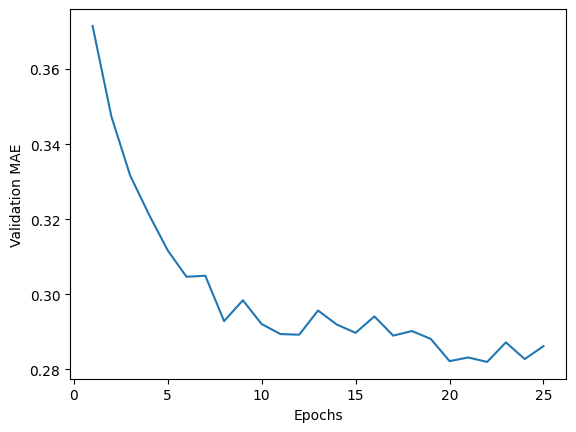

In [ ]:
plt.plot(range(1, len(deep_average_mae_history) + 1), deep_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


The validation MAE above stops improving after around 22 epochs and overfitting will be present after that point.

#8.5.2 Plotting validation scores(deeperModel)

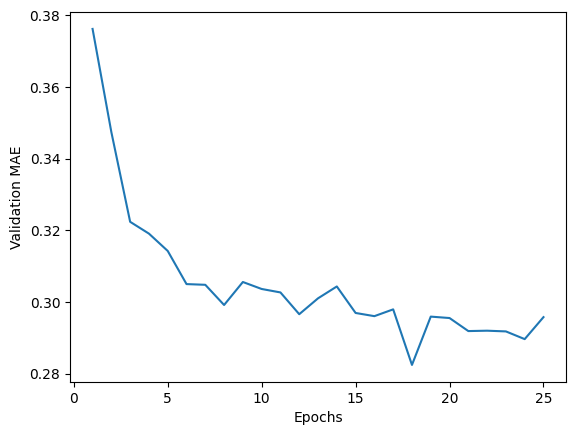

In [ ]:
plt.plot(range(1, len(deeper_average_mae_history) + 1), deeper_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

The validation MAE above stops improving after around 18 epochs and overfitting will be present after that point.

#8.5.3 Plotting validation scores(widerModel)

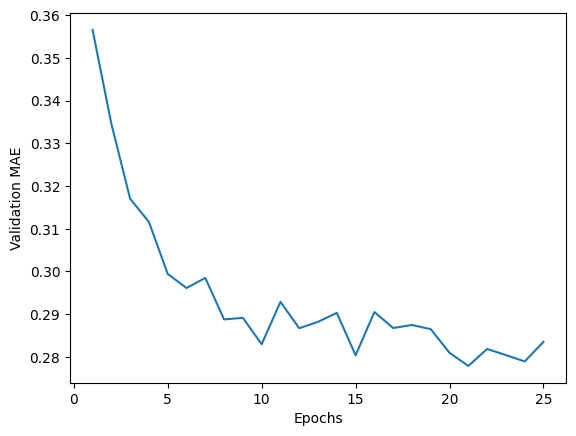

In [ ]:
plt.plot(range(1, len(wider_average_mae_history) + 1), wider_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

The validation MAE above stops improving after around 21 epochs and overfitting will be present after that point.

#8.6 Evaluating model's performance

Epoch 1/22
71/71 [==============================] - 3s 32ms/step - loss: 1.8880 - acc: 0.4943 - val_loss: 0.8748 - val_acc: 0.5827
Epoch 2/22
71/71 [==============================] - 2s 29ms/step - loss: 0.9478 - acc: 0.5815 - val_loss: 0.8948 - val_acc: 0.5748
Epoch 3/22
71/71 [==============================] - 2s 35ms/step - loss: 0.8978 - acc: 0.5815 - val_loss: 0.8578 - val_acc: 0.5984
Epoch 4/22
71/71 [==============================] - 2s 32ms/step - loss: 0.8783 - acc: 0.5877 - val_loss: 0.8465 - val_acc: 0.5984
Epoch 5/22
71/71 [==============================] - 2s 31ms/step - loss: 0.8490 - acc: 0.5982 - val_loss: 0.8309 - val_acc: 0.5906
Epoch 6/22
71/71 [==============================] - 3s 41ms/step - loss: 0.8216 - acc: 0.6123 - val_loss: 0.8138 - val_acc: 0.5827
Epoch 7/22
71/71 [==============================] - 3s 45ms/step - loss: 0.8167 - acc: 0.6088 - val_loss: 0.8065 - val_acc: 0.5984
Epoch 8/22
71/71 [==============================] - 2s 23ms/step - loss: 0.7982 - a

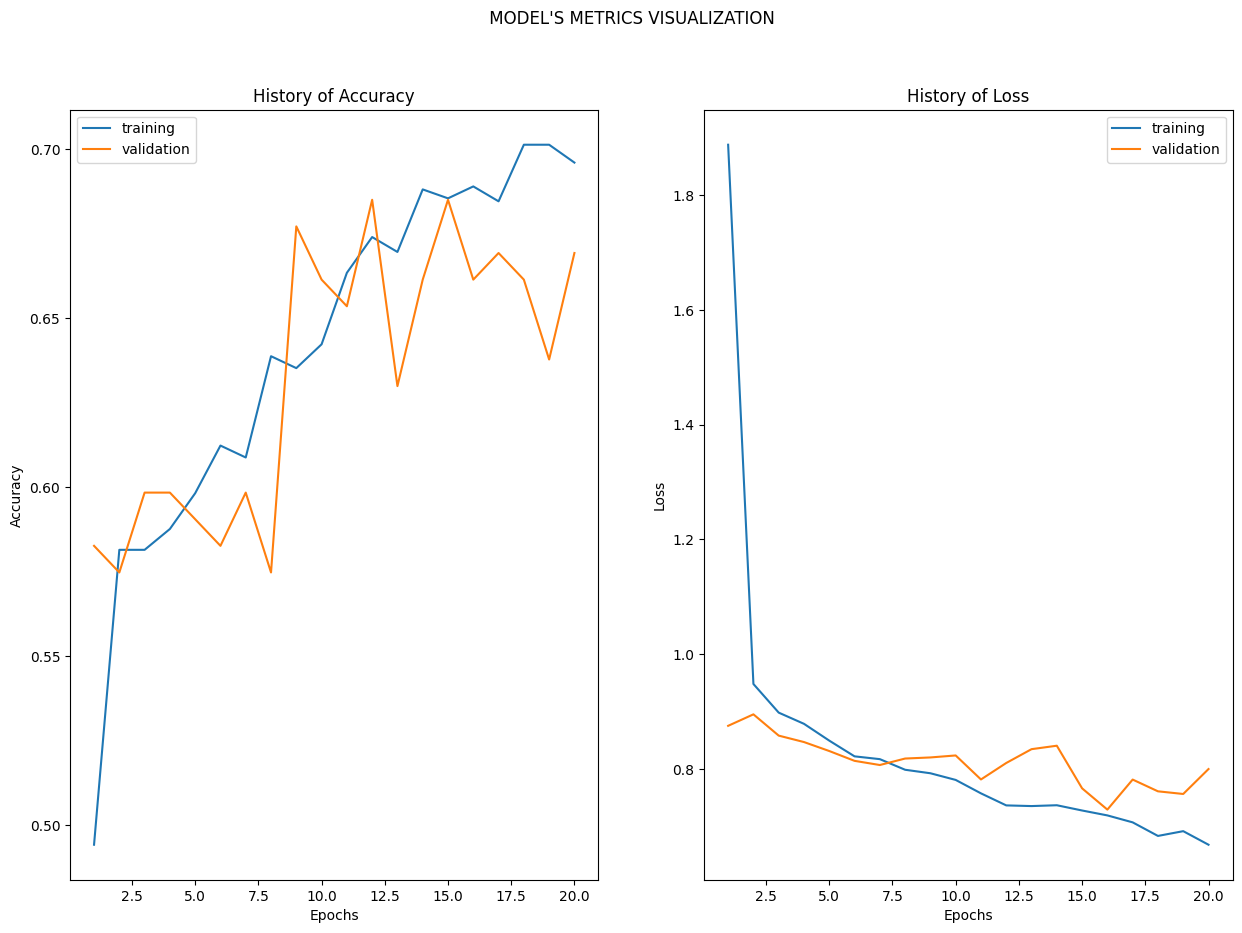

In [57]:
model = deepModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,22,4)

As seen above, the validation and training loss have instances of good fit at the 7.5 epoch. From the 7.5 epoch onwards, the validation loss starts to increase significantly until the tenth epoch, decreases again till the 11th epoch. There are signs of slight overfitting as the validation loss is higher than the training loss. The training loss decreases significantly from the 1st to 20th epoch.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it increases from the 8.5 epoch to the 10th epoch before decreasing from the 10 to the 11.5 epoch. It is evident that there is significant difference between the training and validation accuracy.

Both the precision and recall score is around 0.73 and 0.68 respectively which means that the model's predictions of the positive class is good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.77 and this means that the predictions of this model are around 0.77% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.63 which is considered average performing as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's prediction is considered average performing based on the precision, recall, f1-measure and roc score.

Epoch 1/18
71/71 [==============================] - 3s 30ms/step - loss: 1.3266 - acc: 0.4626 - val_loss: 1.0129 - val_acc: 0.5669
Epoch 2/18
71/71 [==============================] - 2s 29ms/step - loss: 1.0098 - acc: 0.5366 - val_loss: 0.9270 - val_acc: 0.5669
Epoch 3/18
71/71 [==============================] - 2s 28ms/step - loss: 0.9754 - acc: 0.5471 - val_loss: 0.9239 - val_acc: 0.5669
Epoch 4/18
71/71 [==============================] - 2s 24ms/step - loss: 0.9512 - acc: 0.5586 - val_loss: 0.8925 - val_acc: 0.5669
Epoch 5/18
71/71 [==============================] - 2s 23ms/step - loss: 0.9179 - acc: 0.5621 - val_loss: 0.8647 - val_acc: 0.5669
Epoch 6/18
71/71 [==============================] - 1s 20ms/step - loss: 0.9147 - acc: 0.5824 - val_loss: 0.8553 - val_acc: 0.5669
Epoch 7/18
71/71 [==============================] - 2s 24ms/step - loss: 0.9157 - acc: 0.5938 - val_loss: 0.8490 - val_acc: 0.6535
Epoch 8/18
71/71 [==============================] - 2s 24ms/step - loss: 0.8772 - a

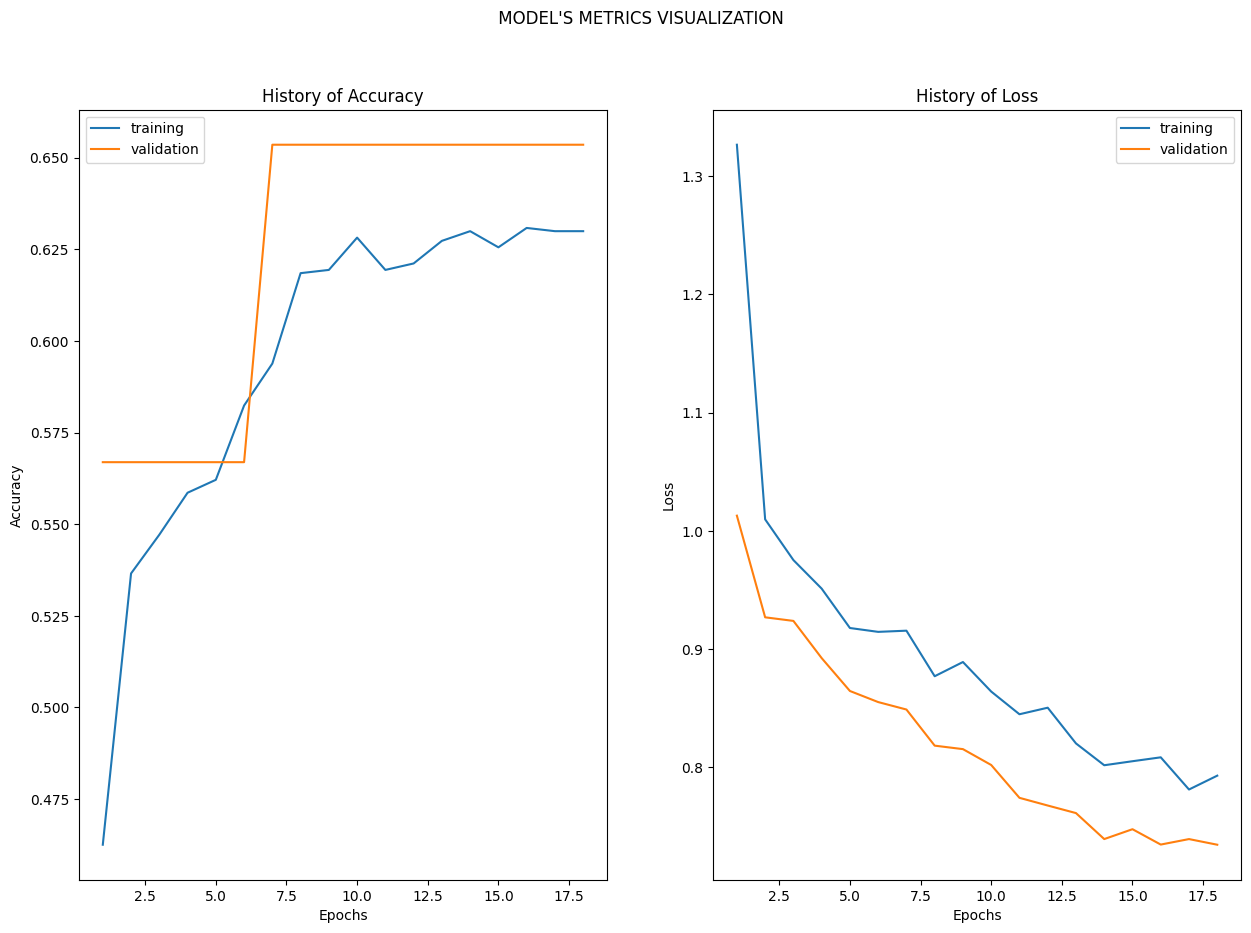

In [58]:
model = deeperModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,18,4)

As seen above, both the validation and training loss decreases significantly from the 1st to 20th epoch. This shows signs of underfitting which means that the model is unable to accurately model the training data.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it remains the same from the 1st epoch to the 6.5th epoch and increases significantly till the 7.5th epoch before remaining the same again till the 17.5th epoch. It is evident that there is significant difference between the training and validation accuracy.

Both the precision and recall score is around 0.52 and 0.65 respectively which means that the model's predictions of the positive class is poor and it is not effective at finding all the true positives from all the actual positive samples. The ROC area, however, it is relatively high at around 0.73 and this means that the predictions of this model are around 0.73% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.54 which is considered poor performing as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's performance is considered poor based on the precision, recall and f1-measure score.

Epoch 1/21
71/71 [==============================] - 5s 55ms/step - loss: 1.6810 - acc: 0.4793 - val_loss: 0.8482 - val_acc: 0.5748
Epoch 2/21
71/71 [==============================] - 3s 48ms/step - loss: 0.9130 - acc: 0.5771 - val_loss: 0.7976 - val_acc: 0.5906
Epoch 3/21
71/71 [==============================] - 3s 36ms/step - loss: 0.9127 - acc: 0.6018 - val_loss: 0.7980 - val_acc: 0.5748
Epoch 4/21
71/71 [==============================] - 2s 34ms/step - loss: 0.8237 - acc: 0.6194 - val_loss: 0.7720 - val_acc: 0.5906
Epoch 5/21
71/71 [==============================] - 2s 33ms/step - loss: 0.7935 - acc: 0.6441 - val_loss: 0.7990 - val_acc: 0.6299
Epoch 6/21
71/71 [==============================] - 4s 50ms/step - loss: 0.7810 - acc: 0.6722 - val_loss: 0.7597 - val_acc: 0.6693
Epoch 7/21
71/71 [==============================] - 3s 40ms/step - loss: 0.7550 - acc: 0.6996 - val_loss: 0.7447 - val_acc: 0.6929
Epoch 8/21
71/71 [==============================] - 3s 35ms/step - loss: 0.7438 - a

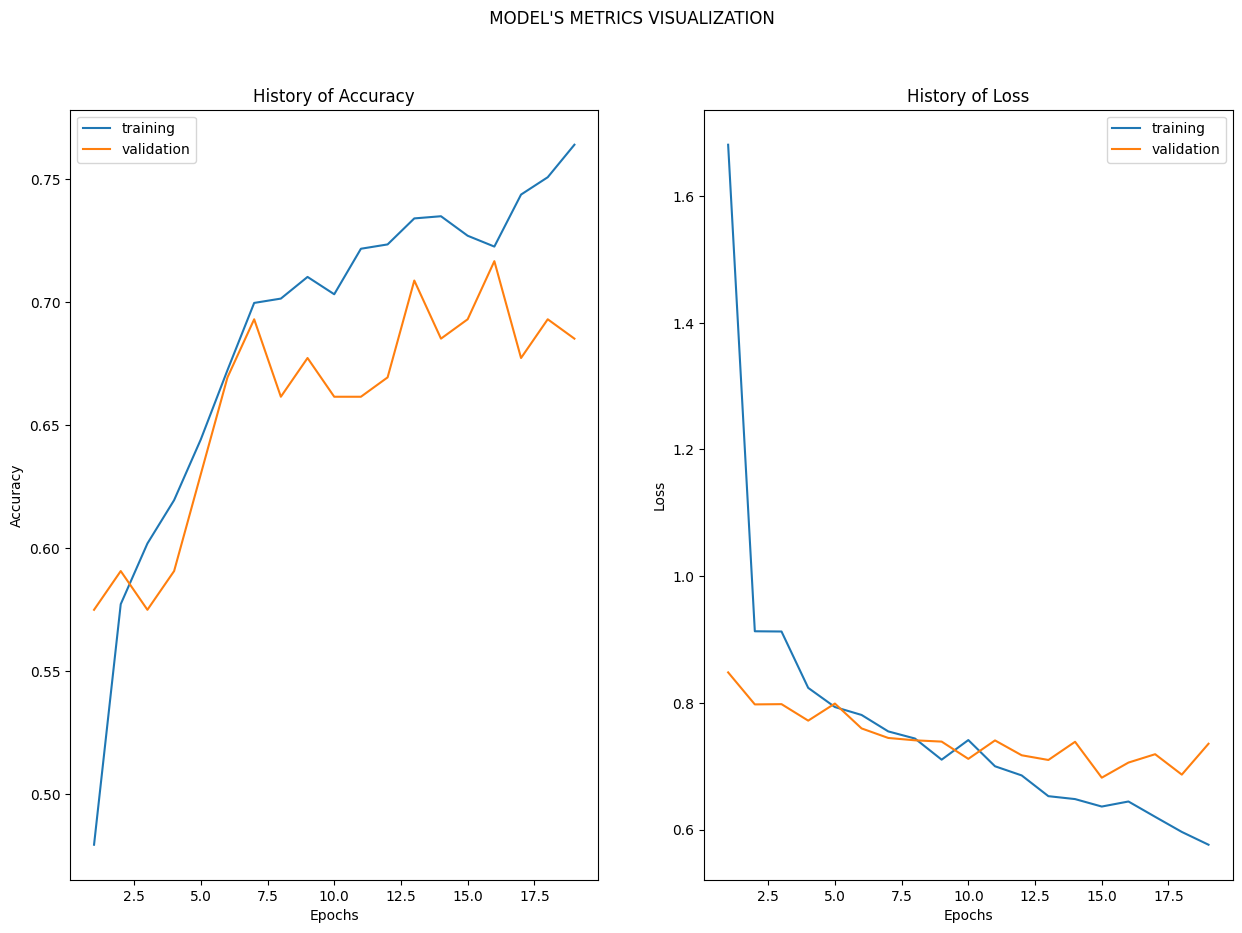

In [80]:
model = widerModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,21,4)

As seen above, both the validation and training loss decreases significantly from the 1st to 20th epoch. This model has signs of good fit as both the validation and training loss decrease and stabilize at a specific point which is around the 5th, 7.6, 9th and 11.7th epoch. There is the Earlystopping callback with a patience of 4 and thus, this model has stopped at the 19th epoch to prevent overfitting.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it increases from the 1st to 2nd epoch before decreasing and increasing from the 3rd to 7.5 epoch. It then fluctuates till the 19 epochs. It is evident that the training and validation accuracy is relatively close from the 5th to 7.5th epoch.

Both the precision and recall score is around 0.71 and 0.68 respectively which means that the model's predictions of the positive class is good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.81 and this means that the predictions of this model are around 0.81% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.63 which is considered average as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's performance is considered good based on the precision, recall and roc score.



Out of all the models, the best model would be the widerModel as the instances of underfitting and overfitting are not that large. The model has relatively good precision, recall and roc score which shows that it is a good performing model.

#8.7 Train and evaluate final production model

##8.7.1 Adding Batch Normalisation to compare final model

In [60]:

# deeper model
def finalModel():

    model = Sequential()

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    print(model)
    return model


Epoch 1/21
71/71 [==============================] - 6s 74ms/step - loss: 21.7250 - acc: 0.4599 - val_loss: 4.9540 - val_acc: 0.4646
Epoch 2/21
71/71 [==============================] - 4s 50ms/step - loss: 16.1438 - acc: 0.5163 - val_loss: 7.1722 - val_acc: 0.4016
Epoch 3/21
71/71 [==============================] - 4s 50ms/step - loss: 14.6792 - acc: 0.5401 - val_loss: 6.3973 - val_acc: 0.5906
Epoch 4/21
71/71 [==============================] - 3s 43ms/step - loss: 9.7740 - acc: 0.5815 - val_loss: 5.4263 - val_acc: 0.5512
Epoch 5/21
71/71 [==============================] - 5s 64ms/step - loss: 8.8133 - acc: 0.5947 - val_loss: 4.3590 - val_acc: 0.5039
Epoch 6/21
71/71 [==============================] - 4s 51ms/step - loss: 5.8182 - acc: 0.6035 - val_loss: 3.5490 - val_acc: 0.6142
Epoch 7/21
71/71 [==============================] - 4s 50ms/step - loss: 4.9566 - acc: 0.6414 - val_loss: 3.7444 - val_acc: 0.6220
Epoch 8/21
71/71 [==============================] - 5s 65ms/step - loss: 3.7309 

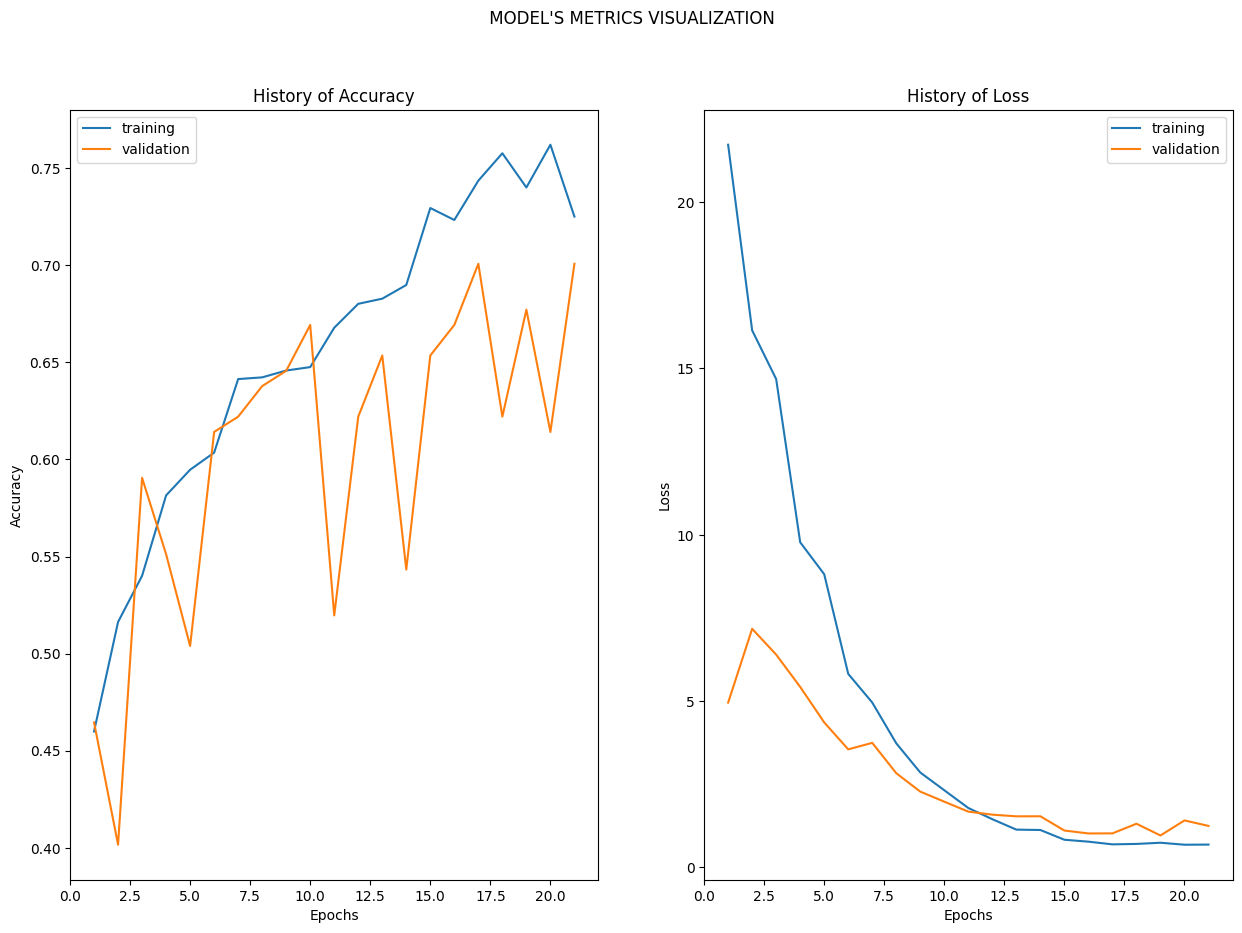

In [61]:
model = finalModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,21,4)

As seen above, both the validation and training loss decreases significantly from the 1st to 20th epoch. This model has signs of good fit as both the validation and training loss decrease and stabilize at a specific point which is around the 20th epoch.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it decreases and increases at different points in the graph and it is evident that the training and validation accuracy is significantly different.

Both the precision and recall score is around 0.71 and 0.70 respectively which means that the model's predictions of the positive class is good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.82 and this means that the predictions of this model are around 0.82% correct as the roc score of 1.0 would determine that the predictions are 100% correct.

After adding batch normalisation, the recall score of the widerModel increases by 0.01%. The f1-measure is 0.69 and previously, it was 0.63 which shows the improvement from the widerModel as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's performance is considered good based on the precision, recall, f1-measure and roc score.

#8.8 Replacing dropout layers with L2 regularisation to compare model's result

In [62]:
from keras.regularizers import l2
ALPHA = 0.001

def L2RegModel():

      model = Sequential()

      model.add(Flatten())
      model.add(BatchNormalization())
      model.add(Dense(128,activation='relu', kernel_regularizer=l2(ALPHA), input_shape = X_train.shape))
      model.add(Dense(128,activation='relu', kernel_regularizer=l2(ALPHA), input_shape = X_train.shape))
      model.add(Dense(OUTPUT_CLASSES,activation='softmax'))
      model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

      return model

## Plotting training and validation loss

Epoch 1/20
71/71 [==============================] - 6s 64ms/step - loss: 7.3440 - acc: 0.4960 - val_loss: 1.8489 - val_acc: 0.6142
Epoch 2/20
71/71 [==============================] - 5s 73ms/step - loss: 4.3173 - acc: 0.5454 - val_loss: 2.7753 - val_acc: 0.4409
Epoch 3/20
71/71 [==============================] - 4s 51ms/step - loss: 3.8878 - acc: 0.5718 - val_loss: 2.8839 - val_acc: 0.5512
Epoch 4/20
71/71 [==============================] - 4s 60ms/step - loss: 3.4612 - acc: 0.5815 - val_loss: 3.7285 - val_acc: 0.4646
Epoch 5/20
71/71 [==============================] - 5s 76ms/step - loss: 3.4084 - acc: 0.6053 - val_loss: 2.9520 - val_acc: 0.4803
Epoch 5: early stopping
10/10 [==============================] - 0s 14ms/step
Train accuracy = 0.641409695148468
Validation accuracy = 0.6141732335090637
Test accuracy = 0.6265822649002075
f1_measure = 0.6276352801835813
roc_area = 0.7253749392520624
precision score = 0.6339318349650366
recall score = 0.6265822784810127


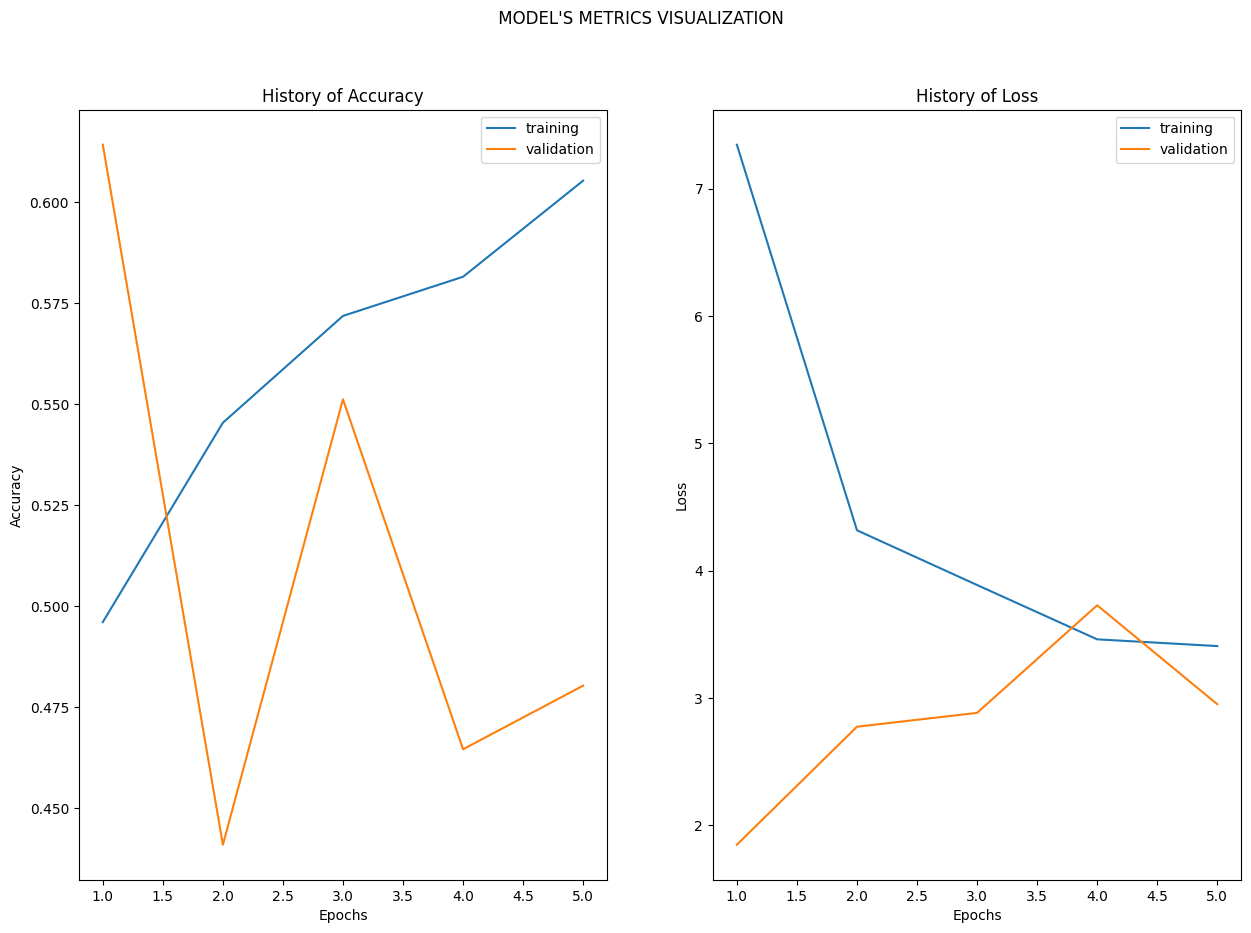

In [68]:
model = L2RegModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

As seen above, the training loss decreases significantly from the first to fifth epoch. The earlystopping callback method is used here with the patience of 4 and this is to prevent overfitting. As seen above, there are signs of overfitting at the 4th epoch as the validation loss is greater than the training loss. It then decreases after the fourth epoch.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it decreases until the 2nd epoch. From the 2nd epoch onwards, it increases until the 3rd epoch, decreases again till the fourth epoch and lastly, increases again till the fifth epoch. It is evident that the training and validation accuracy is significantly different which show signs of overfitting.

Both the precision and recall score is around 0.63 which means that the model's predictions of the positive class is average and it is not that effective at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.73 and this means that the predictions of this model are around 0.73% correct as the roc score of 1.0 would determine that the predictions are 100% correct.

After adding L2 regularisation, the recall score of the widerModel decreases by 0.08%. The f1-measure is 0.63 and is the same as the finalModel but as compared to the finalModel with batch normalisation, it does not perform as well.

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [6]. Hence, the model's performance is considered average based on the precision, recall, f1-measure and roc score.

## 8.8.1 Adding Convolutional layers to model

In [69]:
def ConvModel():
# Initialize the model
    model = Sequential()

    # Add convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Add more convolutional layers
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Add dense layers

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES, activation='softmax'))


    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model

    # # Train the model
    # model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
71/71 [==============================] - 83s 1s/step - loss: 0.8891 - acc: 0.5577 - val_loss: 0.8036 - val_acc: 0.6614
Epoch 2/20
71/71 [==============================] - 89s 1s/step - loss: 0.7648 - acc: 0.6705 - val_loss: 0.7050 - val_acc: 0.6772
Epoch 3/20
71/71 [==============================] - 85s 1s/step - loss: 0.6786 - acc: 0.6916 - val_loss: 0.7233 - val_acc: 0.6614
Epoch 4/20
71/71 [==============================] - 94s 1s/step - loss: 0.6459 - acc: 0.7084 - val_loss: 0.6813 - val_acc: 0.6378
Epoch 5/20
71/71 [==============================] - 89s 1s/step - loss: 0.5856 - acc: 0.7304 - val_loss: 0.5797 - val_acc: 0.7244
Epoch 6/20
71/71 [==============================] - 72s 1s/step - loss: 0.5370 - acc: 0.7612 - val_loss: 0.6271 - val_acc: 0.7165
Epoch 7/20
71/71 [==============================] - 73s 1s/step - loss: 0.4311 - acc: 0.8062 - val_loss: 0.5549 - val_acc: 0.7244
Epoch 8/20
71/71 [==============================] - 70s 974ms/step - loss: 0.4069 - acc: 0

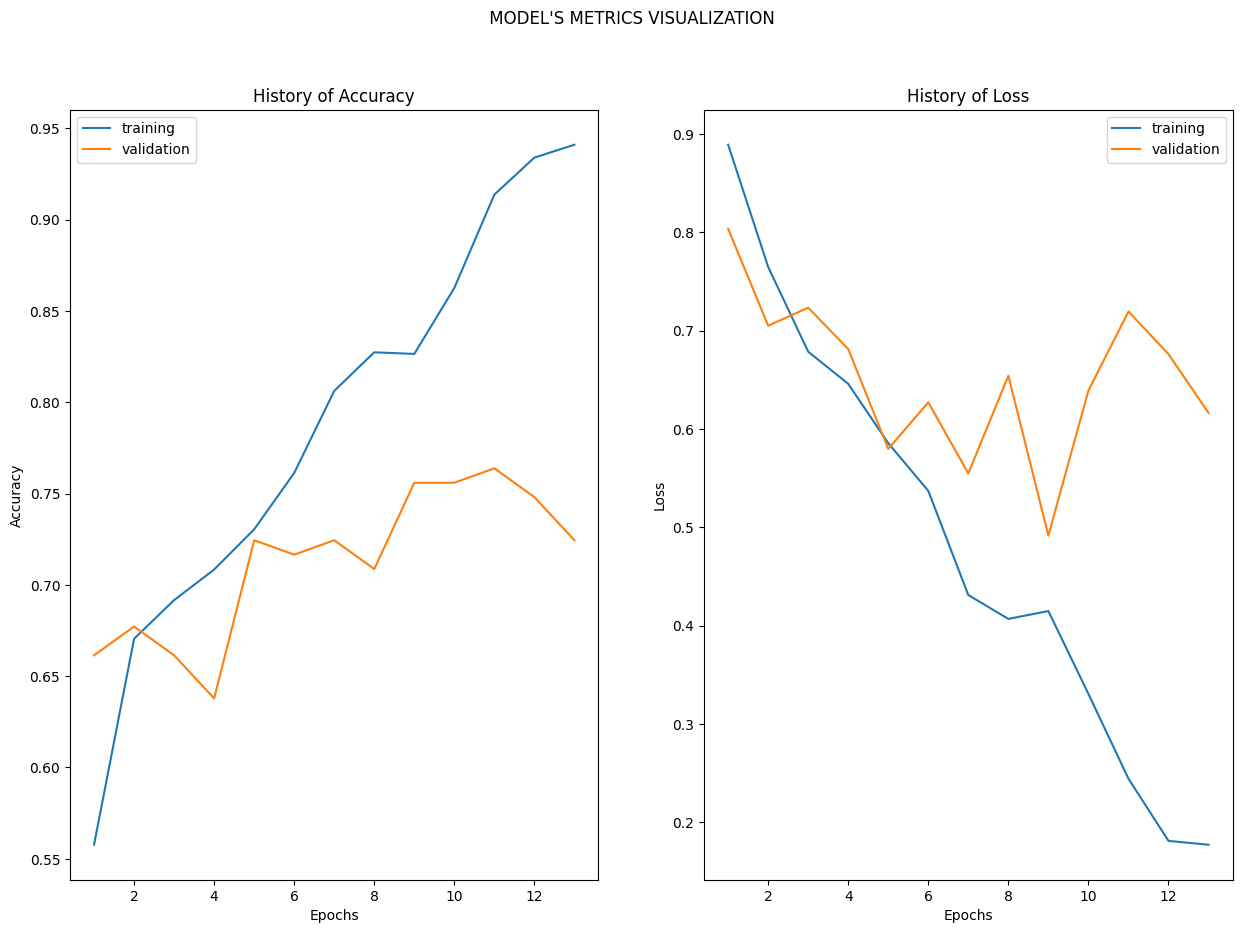

In [70]:
model = ConvModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

As seen above, the training loss decreases significantly from the first to fifth epoch. The earlystopping callback method is used here with the patience of 4 and this is to prevent overfitting. For this model, it has stopped at the 13th epoch. As seen above, there are signs of overfitting at the 5th epoch as the validation loss is greater than the training loss. It then decreases after the fourth epoch.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it increases until the 2nd epoch and then decreases until the 4th epoch. From the 4th epoch onwards, it increases until the 5th epoch and then decreases. It is evident that the training and validation accuracy is significantly different after the fifth epoch which show signs of overfitting.

Both the precision and recall score is around 0.78 which means that the model's predictions of the positive class is good and it is good at finding all the true positives from all the actual positive samples. The ROC area is high at around 0.91 and this means that the predictions of this model are around 0.91% correct as the roc score of 1.0 would determine that the predictions are 100% correct.

After adding the convolution layers, both the precision and recall score of this model as compared to the widerModel, is higher by 0.07%. The f1-measure is 0.78 and is higher than the widerModel by 0.15%. The roc score is 0.91% which is higher than the widerModel by 0.10%.

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [6]. Hence, the model's performance is considered good based on the precision, recall, f1-measure and roc score.

## 8.8.2 Depthwise Separable Convolution

In [66]:
from keras import layers
def depthConvModel():

    model = Sequential()

    # Add convolutional layers
    model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(layers.SeparableConv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Add more convolutional layers
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Add dense layers

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 148, 148, 32)     73        
 Conv2D)                                                         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 separable_conv2d_1 (Separab  (None, 72, 72, 64)       2400      
 leConv2D)                                                       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 separable_conv2d_2 (Separab  (None, 34, 34, 128)    

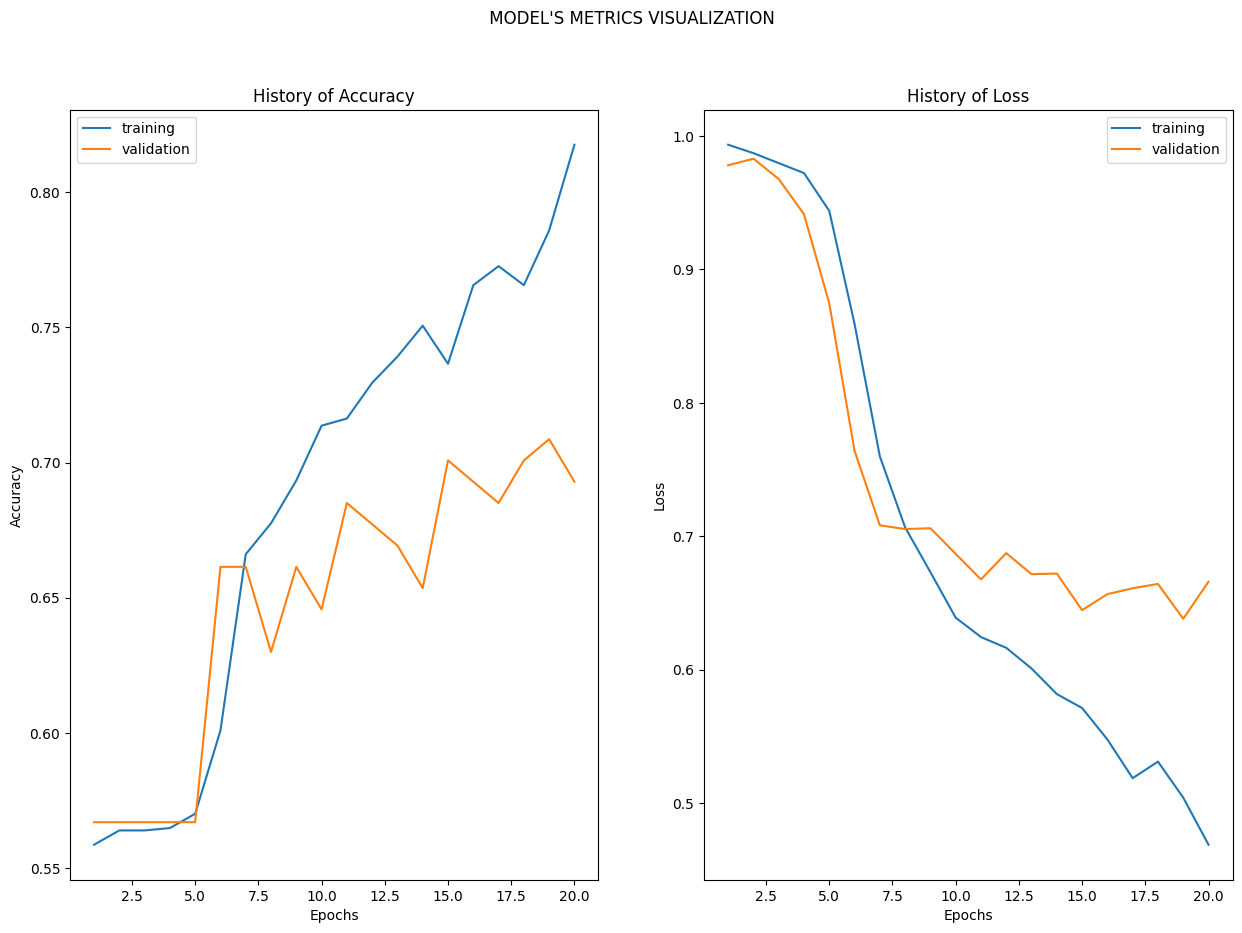

In [67]:
model = depthConvModel()
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

As seen above, both the validation and training loss decreases significantly till the 20th epoch.  There are signs of overfitting after the 8.5 epoch as the validation loss is greater than the training loss.

The accuracy of training increases significantly from the 1st epoch to the 20th epoch. For the validation accuracy, it remains constant until the 5th epoch. From the 5th epoch onwards, it increases until the 3rd epoch, decreases again till the sixth epoch, remains constant and decreases afrer the seventh epoch. It is evident that the training and validation accuracy is significantly different which show signs of overfitting after the 7.5 epoch.

Both the precision and recall score is both around 0.73 respectively which means that the model's predictions of the positive class is considered good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.88 and this means that the predictions of this model are around 0.88% correct as the roc score of 1.0 would determine that the predictions are 100% correct.

After adding depthwise separable convolution, the precision score of this model is lower as compared to the widerModel by 0.04% but the recall score is the same at around 0.73. The f1-measure is also the same at 0.71. As compared to the finalModel with batch normalisation, it performs slightly better.

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [6]. Hence, the model's performance is considered average based on the precision, recall, f1-measure and roc score.

#9. Prediction

In [81]:
model = finalModel()
name = load_preprocess_image("/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (431).png")
name = np.expand_dims(name, axis=0)  # Add an extra dimension for batch size
detect = model.predict(name)
print(detect)
# Get the predicted class index
predictedClassIndex = np.argmax(detect[0])

# Map the predicted class index back to its original label
predictedClassLabel = label_encoder.inverse_transform([predictedClassIndex])[0]

# Print the predicted class label
print("Predicted Class Label:", predictedClassLabel)

1/1 [==============================] - 0s 322ms/step
[[0.43604293 0.38174826 0.18220876]]
Predicted Class Label: benign


#10. Conclusion

In conclusion, after comparing the widerModel with the widerModel with Batch Normalisation, widerModel with L2 Regularisation, Convolutional Model, Depthwise Separable Convolution, the best model would be finalModel which incorporates the Batch Normalisation. This is due to the the good fit of the relationship between the training and validation loss that was monitored as compared to the rest of the other models which had signs of overfitting. The precision and recall is also relatively high at 0.71 and 0.70 respectively. The f1-measure score is good at 0.69 and the roc score is 0.82 which is very good as it means the predictions are 0.82% correct.

This deep learning project has allowed me to develop a deep learning model as depicted above whilst allowing me to explore different algorithms and network. I have achieved the objective of developing an original model with suitable depth following the Deep Learning with Python book. My motivations for this project was also met as I gained more knowledge about the different machine learning models and image segmentation. I also hope that the implementation of this model would save more lives and reduce the workload and time of radiologists.

All in all, this project has seek to counter the problem of imbalanced data and also following the universal workflow of machine learning closely in order to come up with suitable evaluation protocol like K-fold validation. Finetuning and optimising of hyperparameters were also important in developing a good model, as well as the success metrics in the evaluation of the models. I have also applied the advanced techniques of Chapter 7 like the Batch Normalisation, Early Stopping callback and attempted the Depthwise Separable Convolution in this project.

# 11. References

[1] PAHO. 2023. Breast Cancer. Pan American Health Organisation. Retrieved from https://www.paho.org/en/topics/breast-cancer

[2] World Health Organisation. 2021. New global breast cancer initiative highlights renewed commitment to improve survival. WHO. Retrieved from https://www.who.int/news/item/08-03-2021-new-global-breast-cancer-initiative-highlights-renewed-commitment-to-improve-survival

[3] Walid Al-Dhabyani, Mohammed Gomaa, Hussein M. Khaled, and Aly A. Fahmy. 2020. Dataset of breast ultrasound images. Data in Brief 28, (February 2020), 104863. DOI:https://doi.org/10.1016/j.dib.2019.104863

[4] Javatpoint. 2021. Precision and Recall in Machine Learning. Retrieved from https://www.javatpoint.com/precision-and-recall-in-machine-learning

[5] Sarang Narkhede. 2022. Understanding AUC - ROC Curve - Towards Data Science. Medium. Retrieved from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

[6] Haibo He and Yunqian Ma. 2013. Imbalanced Learning: Foundations, Algorithms, and Applications, Page 27 | IEEE eBooks | IEEE Xplore. Retrieved from https://ieeexplore.ieee.org/book/6542371

[7] Jason Brownlee. 2020. How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification. MachineLearningMastery.com (August 2020). Retrieved from https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

[8] Jason Brownlee. 2020. A Gentle Introduction to k-fold Cross-Validation. MachineLearningMastery.com (August 2020). Retrieved from https://machinelearningmastery.com/k-fold-cross-validation/

[9] Jaz Allibhai. 2022. Building an Ensemble Learning Model Using Scikit-learn. Medium. Retrieved from https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

[10] Jaz Allibhai. 2022. Hold-out vs. Cross-validation in Machine Learning - Jaz Allibhai - Medium. Medium. Retrieved from https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f

[11] Stephen Allwright. 2022. What is a good F1 score? Simply explained (2022). Stephen Allwright (December 2022). Retrieved from https://stephenallwright.com/good-f1-score/

[12] Accuracy vs. precision vs. recall in machine learning: what’s the difference? Retrieved from https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall



The code in this project was with reference to these sources:
Aneeshreddyar. 2023. breast_cancer_cnn_20_epochs. Kaggle (August 2023). Retrieved from https://www.kaggle.com/code/aneeshreddyar/breast-cancer-cnn-20-epochs

Additionally, the code implementation in this project was also with reference to my existing project in my CM3015 Machine Learning final assignment.







#12. Appendix

1. Jason Brownlee. 2020. ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.com (September 2020). Retrieved from https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
